In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## Create Shortened DataFrame

In [2]:
# Load Data...
data = [json.loads(line) for line in open("./data/data.jsonl", 'r', encoding='utf-8')]
df = pd.DataFrame(data)


### Create Summary DataFrame for Reference
# Create list for columns used, 1 for used feature, 0 for not used feature
use = [1      # created_at
       , 0    # id
       , 1    # id_str
       , 1    # full_text
       , 0    # truncated
       , 1    # display_text_range
       , 1    # entities
       , 1    # source
       , 0    # in_reply_to_status_id
       , 0    # in_reply_to_status_id_str
       , 0    # in_reply_to_user_id
       , 0    # in_reply_to_user_id_str
       , 0    # in_reply_to_screen_name
       , 1    # user
       , 0    # geo 
       , 0    # coordinates
       , 0    # place (maybe)
       , 0    # contributors
       , 1    # is_quote_status
       , 0    # quoted_status_id 
       , 0    # quoted_status_id_str 
       , 0    # quoted_status_permalink
       , 0    # quoted_status (maybe)
       , 1    # retweet_count 
       , 1    # favorite_count
       , 0    # favorited
       , 0    # retweeted
       , 1    # possibly_sensitive 
       , 1    # lang
       , 1    # retweeted_status
       , 0    # extended_entities (maybe)
       , 0    # withheld_in_countries
       ]

# Create a dictionary with summary information
dict_ = {'feature': list(df.columns)
         , 'nulls': df.isna().sum().values
         , 'non_nulls': df.notnull().sum().values
         , 'use': use
        }
summary_df = pd.DataFrame(dict_)


### Shorten Columns
# create a list of dropped column names
drop_col = list(summary_df.feature[summary_df.use !=1])

# create a df_short dataframe with only the columns we need
df = df.drop(columns = drop_col)

# create a list of kept column names
use_col = list(summary_df.feature[summary_df.use==1])

# verify used columns are present
print(f'Used Columns Are Present: {use_col == list(df.columns)}')

# create datetime column
df['datetime'] = pd.to_datetime(df.created_at)

# drop created_at
df.drop('created_at'
        , axis=1
        , inplace=True
       )

Used Columns Are Present: True


In [3]:
df.head()

,id_str,full_text,display_text_range,entities,source,user,is_quote_status,retweet_count,favorite_count,possibly_sensitive,lang,retweeted_status,datetime
0,1311093385688735744,Biden a professional debater?? Hardly!! More ...,"[0, 71]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://mobile.twitter.com"" rel=""nofo...","{'id': 117904481, 'id_str': '117904481', 'name...",True,0,0,False,en,NaN,2020-09-29 23:59:56+00:00
1,1311093394400333824,RT @DarDar458: #PresidentialDebate #Debates202...,"[0, 73]","{'hashtags': [{'text': 'PresidentialDebate', '...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 30140760, 'id_str': '30140760', 'name':...",True,1,0,NaN,und,{'created_at': 'Tue Sep 29 23:55:42 +0000 2020...,2020-09-29 23:59:58+00:00
2,1311093401652277252,How can Biden stand a chance against Trump in ...,"[0, 280]","{'hashtags': [{'text': 'VarneyCo', 'indices': ...","<a href=""https://studio.twitter.com"" rel=""nofo...","{'id': 281610530, 'id_str': '281610530', 'name...",False,25,100,False,en,NaN,2020-09-30 00:00:00+00:00
3,1311093410737070086,RT @abbydphillip: Very reminiscent of pre-2018...,"[0, 108]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 88223320, 'id_str': '88223320', 'name':...",True,351,0,NaN,en,{'created_at': 'Tue Sep 29 23:00:28 +0000 2020...,2020-09-30 00:00:02+00:00
4,1311093419100561408,RT @RudyGiuliani: Why was Corrupt Biden’s son ...,"[0, 110]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 44295160, 'id_str': '44295160', 'name':...",False,15672,0,NaN,en,{'created_at': 'Tue Sep 29 19:07:59 +0000 2020...,2020-09-30 00:00:04+00:00


In [4]:
df.columns

Index(['id_str', 'full_text', 'display_text_range', 'entities', 'source',
       'user', 'is_quote_status', 'retweet_count', 'favorite_count',
       'possibly_sensitive', 'lang', 'retweeted_status', 'datetime'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140337 entries, 0 to 140336
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   id_str              140337 non-null  object             
 1   full_text           140337 non-null  object             
 2   display_text_range  140337 non-null  object             
 3   entities            140337 non-null  object             
 4   source              140337 non-null  object             
 5   user                140337 non-null  object             
 6   is_quote_status     140337 non-null  bool               
 7   retweet_count       140337 non-null  int64              
 8   favorite_count      140337 non-null  int64              
 9   possibly_sensitive  32333 non-null   object             
 10  lang                140337 non-null  object             
 11  retweeted_status    106900 non-null  object             
 12  datetime        

## Min and Max Dates

In [6]:
print(f'Earliest date: {df.datetime.min()}')
print(f'Latest date: {df.datetime.max()}')

Earliest date: 2020-09-29 23:59:56+00:00
Latest date: 2020-10-02 23:59:54+00:00


## Create columns with numbers

## id_str column review

In [7]:
# there are 140,337 tweet id's (I think)
df.id_str.nunique()

140337

### display_text_range column to int()

In [8]:
type(df.display_text_range.iloc[0])

list

In [9]:
df.display_text_range.iloc[0][-1]

71

In [10]:
def text_length(lst):
    """
    Parses the end of list [0, 15] returns 15
    
    Input: lst, column entry as from display_text_range
    Output: int, length of tweet
    """
    return lst[-1]

In [11]:
df['text_length'] = df.display_text_range.apply(text_length)

In [12]:
# Drop display_text_range
df.drop('display_text_range'
        , axis = 1
        , inplace = True
       )

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140337 entries, 0 to 140336
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   id_str              140337 non-null  object             
 1   full_text           140337 non-null  object             
 2   entities            140337 non-null  object             
 3   source              140337 non-null  object             
 4   user                140337 non-null  object             
 5   is_quote_status     140337 non-null  bool               
 6   retweet_count       140337 non-null  int64              
 7   favorite_count      140337 non-null  int64              
 8   possibly_sensitive  32333 non-null   object             
 9   lang                140337 non-null  object             
 10  retweeted_status    106900 non-null  object             
 11  datetime            140337 non-null  datetime64[ns, UTC]
 12  text_length     

### entities column (come back to this wtih Julia and Mathias)

In [14]:
df.entities.iloc[0]

{'hashtags': [],
 'symbols': [],
 'user_mentions': [],
 'urls': [{'url': 'https://t.co/cQuxzexXYt',
   'expanded_url': 'https://twitter.com/IngrahamAngle/status/1311081374510710784',
   'display_url': 'twitter.com/IngrahamAngle/…',
   'indices': [72, 95]}]}

In [15]:
df.entities.iloc[1]

{'hashtags': [{'text': 'PresidentialDebate', 'indices': [15, 34]},
  {'text': 'Debates2020', 'indices': [35, 47]},
  {'text': 'TrumpIsANationalDisgrace', 'indices': [48, 73]}],
 'symbols': [],
 'user_mentions': [{'screen_name': 'DarDar458',
   'name': 'DarDar45 🌊 🆘',
   'id': 1084234892840484864,
   'id_str': '1084234892840484864',
   'indices': [3, 13]}],
 'urls': []}

In [16]:
df.entities.iloc[100]

{'hashtags': [],
 'symbols': [],
 'user_mentions': [{'screen_name': 'HizbkKhan',
   'name': 'Hizbullah Khan',
   'id': 1015029427284127745,
   'id_str': '1015029427284127745',
   'indices': [3, 13]}],
 'urls': [],
 'media': [{'id': 1310731423184191493,
   'id_str': '1310731423184191493',
   'indices': [93, 116],
   'media_url': 'http://pbs.twimg.com/ext_tw_video_thumb/1310731423184191493/pu/img/kXb4Oq2Wb0p8on5F.jpg',
   'media_url_https': 'https://pbs.twimg.com/ext_tw_video_thumb/1310731423184191493/pu/img/kXb4Oq2Wb0p8on5F.jpg',
   'url': 'https://t.co/XnGBT6jpLl',
   'display_url': 'pic.twitter.com/XnGBT6jpLl',
   'expanded_url': 'https://twitter.com/HizbkKhan/status/1310731479748669440/video/1',
   'type': 'photo',
   'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'medium': {'w': 628, 'h': 360, 'resize': 'fit'},
    'large': {'w': 628, 'h': 360, 'resize': 'fit'},
    'small': {'w': 628, 'h': 360, 'resize': 'fit'}},
   'source_status_id': 1310731479748669440,
   'sourc

### source column

In [17]:
df.source.iloc[0]

'<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>'

In [18]:
# write a function to prase between <a></a>

from bs4 import BeautifulSoup

def btw_a(txt):
    """
    Returns text between the <a></a>
    Input: txt
    Output: txt
    """
    soup = BeautifulSoup(txt)
    for x in soup.find_all('a'):
        return x.get_text()    

In [19]:
# test the function btw_a
txt = '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>'
btw_a(txt)

'Twitter Web App'

In [20]:
# apply it to source column
df.source = df.source.apply(btw_a)

In [21]:
# check work
df.source.head()

0         Twitter Web App
1      Twitter for iPhone
2    Twitter Media Studio
3      Twitter for iPhone
4      Twitter for iPhone
Name: source, dtype: object

In [22]:
# find the unique values
df.source.value_counts()

Twitter for iPhone         62080
Twitter for Android        38641
Twitter Web App            29655
Twitter for iPad            8046
TweetDeck                    459
                           ...  
tsartbot                       1
zeroedtweets                   1
Sam R                          1
Españolimetro                  1
Guanduania Humanitarian        1
Name: source, Length: 310, dtype: int64

In [23]:
len(df.source.value_counts())

310

In [24]:
source_lst = df.source.value_counts().index
source_lst

Index(['Twitter for iPhone', 'Twitter for Android', 'Twitter Web App',
       'Twitter for iPad', 'TweetDeck', 'Tweetbot for iΟS', 'WordPress.com',
       'dlvr.it', 'IFTTT', 'Twitter for Mac',
       ...
       'Bad News for Trump', 'Reddit Tweeter ', 'SocialDog for Twitter',
       'Grassroots DNC', 'App for DutchCryptoTalk.com', 'tsartbot',
       'zeroedtweets', 'Sam R', 'Españolimetro', 'Guanduania Humanitarian'],
      dtype='object', length=310)

### user column

In [25]:
df.user.iloc[0]

{'id': 117904481,
 'id_str': '117904481',
 'name': 'SharonS',
 'screen_name': 'sfshores53',
 'location': 'America ',
 'description': 'Conservative/#MAGA/ #WWG1WGA /MbrNRA/#Trump2020/Pro-Life/Pro-2nd Amend/parler@SharonA53/ NO DMs-/Patriots-will follow all/will unfollow those who do not follow',
 'url': None,
 'entities': {'description': {'urls': []}},
 'protected': False,
 'followers_count': 4065,
 'friends_count': 4998,
 'listed_count': 16,
 'created_at': 'Sat Feb 27 00:36:23 +0000 2010',
 'favourites_count': 3659,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': True,
 'verified': False,
 'statuses_count': 6156,
 'lang': None,
 'contributors_enabled': False,
 'is_translator': False,
 'is_translation_enabled': False,
 'profile_background_color': '0099B9',
 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme4/bg.gif',
 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme4/bg.gif',
 'profile_background_tile': False,
 'profile_ima

In [26]:
type(df.user.iloc[0])

dict

In [27]:
# create function to pull out user profile value from user dictionary
def user_id(dict_):
    """
    Pulls out user id from user dictionary
    Input: dict, user dictionary
    Output: str, user_id
    """    
    return dict_['id_str']

In [28]:
# create user id column
df['user_id'] = df.user.apply(user_id)

In [29]:
# there are 121,040 unique user id's
df.user_id.nunique()

121040

In [30]:
# user follower_count sample
df.user.iloc[0]['followers_count']

4065

In [31]:
# create function to pull out user profile value from user dictionary
def followers_count(dict_):
    """
    Pulls out user id from user dictionary
    Input: dict, user dictionary
    Output: int, followers_count
    """    
    return dict_['followers_count']

In [32]:
# create followers count column
df['followers_count'] = df.user.apply(followers_count)

In [33]:
# check data type
type(df.followers_count.iloc[0])

numpy.int64

In [34]:
# user friends__count sample
df.user.iloc[0]['friends_count']

4998

In [35]:
# create function to pull out user profile value from user dictionary
def friends_count(dict_):
    """
    Pulls out user id from user dictionary
    Input: dict, user dictionary
    Output: int, friends_count
    """    
    return dict_['friends_count']

In [36]:
# create followers count column
df['friends_count'] = df.user.apply(friends_count)

In [37]:
# check data type
type(df.friends_count.iloc[0])

numpy.int64

In [38]:
# user location sample
df.user.iloc[0]['location']

'America '

In [39]:
# create function to pull out user profile value from user dictionary
def location(dict_):
    """
    Pulls out user id from user dictionary
    Input: dict, user dictionary
    Output: str, location
    """    
    return dict_['location']

In [40]:
# create user locations column
df['user_location'] = df.user.apply(location)

In [41]:
# check data type
type(df.user_location.iloc[0])

str

In [42]:
# user created sample
df.user.iloc[0]['created_at']

'Sat Feb 27 00:36:23 +0000 2010'

In [43]:
# create function to pull out user profile value from user dictionary
def acc_created(dict_):
    """
    Pulls out user id from user dictionary
    Input: dict, user dictionary
    Output: str, account created
    """    
    return dict_['created_at']

In [44]:
# create user locations column
df['acct_created'] = df.user.apply(acc_created)

In [45]:
# check data type
type(df.acct_created.iloc[0])

str

In [46]:
# user statuses_count sample
df.user.iloc[0]['statuses_count']

6156

In [47]:
# create function to pull out user profile value from user dictionary
def statuses_count(dict_):
    """
    Pulls out user id from user dictionary
    Input: dict, user dictionary
    Output: int, statuses_count
    """    
    return dict_['statuses_count']

In [48]:
# create user statuses_count column
df['statuses_count'] = df.user.apply(statuses_count)

In [49]:
# check data type
type(df.statuses_count.iloc[0])

numpy.int64

In [50]:
# user following sample
df.user.iloc[0]['following']

False

In [51]:
# create function to pull out user profile value from user dictionary
def following(dict_):
    """
    Pulls out user id from user dictionary
    Input: dict, user dictionary
    Output: bool, following
    """    
    return dict_['following']

In [52]:
# create user following column
df['following'] = df.user.apply(following)

In [53]:
# check data type
type(df.following.iloc[0])

numpy.bool_

In [54]:
# user following_request_sent sample
df.user.iloc[0]['follow_request_sent']

False

In [55]:
# create function to pull out user profile value from user dictionary
def following_request(dict_):
    """
    Pulls out user id from user dictionary
    Input: dict, user dictionary
    Output: bool, following
    """    
    return dict_['follow_request_sent']

In [56]:
# create user following column
df['following_request'] = df.user.apply(following_request)

In [57]:
# check data type
type(df.following_request.iloc[0])

numpy.bool_

In [58]:
# user following_request_sent sample
df.user.iloc[0]['notifications']

False

In [59]:
# create function to pull out user profile value from user dictionary
def notifications(dict_):
    """
    Pulls out user id from user dictionary
    Input: dict, user dictionary
    Output: bool, notifications
    """    
    return dict_['notifications']

In [60]:
# create user following column
df['notifications'] = df.user.apply(notifications)

In [61]:
# check data type
type(df.notifications.iloc[0])

numpy.bool_

In [62]:
# user description sample
df.user.iloc[0]['description']

'Conservative/#MAGA/ #WWG1WGA /MbrNRA/#Trump2020/Pro-Life/Pro-2nd Amend/parler@SharonA53/ NO DMs-/Patriots-will follow all/will unfollow those who do not follow'

In [63]:
# create function to pull out user profile value from user dictionary
def user_descriptions(dict_):
    """
    Pulls out user id from user dictionary
    Input: dict, user dictionary
    Output: str, user_descriptions
    """    
    return dict_['description']

In [64]:
# create user following column
df['user_descriptions'] = df.user.apply(user_descriptions)

In [65]:
# check data type
type(df.user_descriptions.iloc[0])

str

## Creating A Influencing Score

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140337 entries, 0 to 140336
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   id_str              140337 non-null  object             
 1   full_text           140337 non-null  object             
 2   entities            140337 non-null  object             
 3   source              140319 non-null  object             
 4   user                140337 non-null  object             
 5   is_quote_status     140337 non-null  bool               
 6   retweet_count       140337 non-null  int64              
 7   favorite_count      140337 non-null  int64              
 8   possibly_sensitive  32333 non-null   object             
 9   lang                140337 non-null  object             
 10  retweeted_status    106900 non-null  object             
 11  datetime            140337 non-null  datetime64[ns, UTC]
 12  text_length     

## The int() columns seems interesting, investigate further

In [67]:
# retweet_count stats:
df.retweet_count.mean(), df.retweet_count.median(), df.retweet_count.std()

(21028.81549413198, 859.0, 66438.94603761076)

In [68]:
# favorite_count stats:
df.favorite_count.mean(), df.favorite_count.median(), df.favorite_count.std()

(4.9153395041934775, 0.0, 661.1712932699155)

In [69]:
# text_length stats:
df.text_length.mean(), df.text_length.median(), df.text_length.std()

(118.03955478597946, 139.0, 52.76082452811671)

In [70]:
# followers_count stats:
df.followers_count.mean(), df.followers_count.median(), df.followers_count.std()

(6257.545629449111, 423.0, 349213.32380061835)

In [71]:
# friends_count stats:
df.friends_count.mean(), df.friends_count.median(), df.friends_count.std()

(2503.2387253539696, 690.0, 7632.612775724196)

In [72]:
# statuses_count stats:
df.statuses_count.mean(), df.statuses_count.median(), df.statuses_count.std()

(50793.964207586025, 17076.0, 102684.62866876785)

## full_text analysis

In [73]:
# is this a negative or positive comment?
df.full_text.iloc[0]

'Biden a professional debater??  Hardly!! More like a professional liar! https://t.co/cQuxzexXYt'

In [74]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [75]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/david/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [76]:
sia = SentimentIntensityAnalyzer()

In [77]:
df['sentiment_scores'] = df.full_text.apply(lambda x: sia.polarity_scores(x))

In [78]:
df.sentiment_scores.iloc[0]

{'neg': 0.335, 'neu': 0.489, 'pos': 0.176, 'compound': -0.5081}

In [79]:
df['compound_score'] = df.sentiment_scores.apply(lambda x: x['compound'])

In [80]:
df['sentiment'] = df.compound_score.apply(lambda x: 1 if x > 0 else (0 if x==0 else -1))

In [81]:
df.sentiment.value_counts()

 1    50527
-1    45748
 0    44062
Name: sentiment, dtype: int64

## Biden Trump Mentions in full_text

In [82]:
# find Biden mentions in full_text
df['Biden_mentions'] = df.full_text.apply(lambda x: x.lower()).str.find('biden')
df['Biden_mentions'] = df.Biden_mentions.apply(lambda x: -1 if x==-1 else 1)
df.Biden_mentions.value_counts()

-1    102438
 1     37899
Name: Biden_mentions, dtype: int64

In [83]:
# find Trump mentions in full_text
df['Trump_mentions'] = df.full_text.apply(lambda x: x.lower()).str.find('trump')
df['Trump_mentions'] = df.Trump_mentions.apply(lambda x: -1 if x==-1 else 1)
df.Trump_mentions.value_counts()

 1    82711
-1    57626
Name: Trump_mentions, dtype: int64

## Popular hastags in user_descriptions

In [84]:
# user_descriptions hastags
df.user_descriptions.iloc[3]

'Politics reporter covering elections & voting @businessinsider. Bad speller. Extremely New England. RTs/likes=👀not👍🏼 say hi/send tips to gpanetta@insider.com'

In [85]:
import re
sent = df.user_descriptions.iloc[1]
re.findall(r"#(\w+)", sent)

['Resisters', 'BlueNoMatterWho', 'BlackLivesMatter', 'NoDMs', 'RightMatters']

In [86]:
sent = df.user_descriptions.iloc[4]
re.findall(r"#(\w+)", sent)

[]

In [87]:
# hastags mentioned in text
sent = df.full_text.iloc[2]
sent

'How can Biden stand a chance against Trump in tonight\'s Presidential Debate? @wjmcgurn says he needs to stay calm, like how he was against Paul Ryan in 2012: "The best thing he can do is leave Angry Joe in the basement. I don\'t think he can out-Trump Trump." #VarneyCo #2020Debate https://t.co/DKU4ausBzT'

In [88]:
re.findall(r"#(\w+)", sent)

['VarneyCo', '2020Debate']

In [89]:
user_descriptions_hastags = df.user_descriptions.apply(lambda x: re.findall(r"#(\w+)", x))

In [90]:
user_descriptions_hastags_dict = {}
for x in user_descriptions_hastags:
    for y in x:
        if y.lower() in user_descriptions_hastags_dict:
            user_descriptions_hastags_dict[y.lower()] += 1
        else:
            user_descriptions_hastags_dict[y.lower()] = 1

In [91]:
user_descriptions_hastags_dict

{'maga': 8446,
 'wwg1wga': 2163,
 'trump2020': 3631,
 'resisters': 38,
 'bluenomatterwho': 16,
 'blacklivesmatter': 1823,
 'nodms': 16,
 'rightmatters': 56,
 'obamaalumni': 1,
 'deplorable': 190,
 'intactivist': 1,
 'tump': 1,
 'usa': 220,
 'always': 4,
 'kag': 3752,
 'cherokeeproud': 1,
 'mmiw': 16,
 'indegiousresistance': 1,
 'uglydogs': 5,
 'resistance': 868,
 'americafirst': 603,
 'ingodwetrust': 49,
 'jeep': 6,
 'renegade': 3,
 'backtheblue': 732,
 'handsoffmyguns': 5,
 'gunchick': 4,
 'shelties': 5,
 'nevergiveup': 5,
 'dreambig': 3,
 'selfemployed': 1,
 'entrepreneur': 20,
 'electoralcollege': 2,
 'savethechildren': 390,
 'thegreatawakening': 219,
 'kag2020': 717,
 'declas': 4,
 'nra': 825,
 'prolife': 809,
 'socialismkills': 10,
 'democratsarethepartyofsatan': 4,
 'resist': 3425,
 'american': 38,
 'patriot': 843,
 'wwgiwga': 5,
 '2a': 1682,
 'theresistance': 1072,
 'socialjustice': 17,
 'socialdemocrat': 3,
 'hr': 2,
 'fbr': 1026,
 'bluewave': 353,
 'blm': 1916,
 'israel': 117,

In [92]:
user_descriptions_hastags_dict_sorted = sorted(user_descriptions_hastags_dict.items()
                                               , key=lambda kv: kv[1]
                                               , reverse=True
                                              )
user_descriptions_hastags_dict_sorted

[('maga', 8446),
 ('kag', 3752),
 ('trump2020', 3631),
 ('resist', 3425),
 ('wwg1wga', 2163),
 ('blm', 1916),
 ('blacklivesmatter', 1823),
 ('bidenharris2020', 1794),
 ('2a', 1682),
 ('theresistance', 1072),
 ('fbr', 1026),
 ('resistance', 868),
 ('patriot', 843),
 ('nra', 825),
 ('trump', 812),
 ('prolife', 809),
 ('voteblue', 757),
 ('backtheblue', 732),
 ('kag2020', 717),
 ('conservative', 657),
 ('1a', 644),
 ('buildthewall', 616),
 ('americafirst', 603),
 ('walkaway', 545),
 ('biden2020', 534),
 ('draintheswamp', 488),
 ('qanon', 438),
 ('savethechildren', 390),
 ('vote', 384),
 ('bidenharris', 383),
 ('christian', 382),
 ('bluewave', 353),
 ('maga2020', 318),
 ('fightback', 315),
 ('trumptrain', 300),
 ('godwins', 294),
 ('resister', 291),
 ('q', 279),
 ('bluelivesmatter', 278),
 ('votebluenomatterwho', 270),
 ('nevertrump', 253),
 ('lgbtq', 250),
 ('usa', 220),
 ('thegreatawakening', 219),
 ('obamagate', 217),
 ('bluewave2020', 207),
 ('alllivesmatter', 201),
 ('notmypresident',

In [93]:
user_descriptions_hastags_dict_sorted[:20]

[('maga', 8446),
 ('kag', 3752),
 ('trump2020', 3631),
 ('resist', 3425),
 ('wwg1wga', 2163),
 ('blm', 1916),
 ('blacklivesmatter', 1823),
 ('bidenharris2020', 1794),
 ('2a', 1682),
 ('theresistance', 1072),
 ('fbr', 1026),
 ('resistance', 868),
 ('patriot', 843),
 ('nra', 825),
 ('trump', 812),
 ('prolife', 809),
 ('voteblue', 757),
 ('backtheblue', 732),
 ('kag2020', 717),
 ('conservative', 657)]

## Popular hastags in full_text

In [94]:
full_text_hastags = df.full_text.apply(lambda x: re.findall(r"#(\w+)", x))
type(full_text_hastags)

pandas.core.series.Series

In [95]:
full_text_hastags[2][1].lower()

'2020debate'

In [96]:
full_text_hastags_dict = {}
for x in full_text_hastags:
    for y in x:
        if y.lower() in full_text_hastags_dict:
            full_text_hastags_dict[y.lower()] += 1
        else:
            full_text_hastags_dict[y.lower()] = 1

In [97]:
full_text_hastags_dict

{'presidentialdebate': 307,
 'debates2020': 2085,
 'trumpisanationaldisgrace': 24,
 'varneyco': 2,
 '2020debate': 30,
 'truckers4trump': 7,
 'maduronuestravozenlaonu': 1,
 'trump2020': 493,
 'bidensshitstorm': 1,
 'debatetuesday': 36,
 'presidentialdebate2020': 173,
 'byerudy': 13,
 'sleepyjoe': 26,
 'crookedhillary': 6,
 'debate': 156,
 'trump': 675,
 'trum': 7,
 'maga': 428,
 'trumptrain2020': 4,
 'aag': 4,
 'aag2020': 4,
 'jornaldarecord': 2,
 'jr24h': 2,
 'jornaldacultura': 1,
 'argentinasupportstrump': 26,
 'trumppence2020': 21,
 'debate2020': 181,
 'biden': 281,
 'hawkins': 4,
 'jorgensen': 4,
 'yacpolls': 4,
 'elecciones2020': 6,
 'white': 3,
 'joebidenkamalaharris2020': 6,
 'bidenharrislandslide2020': 21,
 'ballotharvesting': 16,
 'trumpcrimefamily': 26,
 'taxes': 3,
 'irs': 3,
 'americaortrump': 21,
 'liarinchief': 15,
 'grifterinchief': 1,
 'scotus': 16,
 'bidenharristosaveamerica': 26,
 'nyt': 4,
 'trumpvirus': 77,
 'bidenvstrump': 3,
 'trumpmeltdown': 163,
 'adderall': 1,
 

In [98]:
full_text_hastags_dict_sorted = sorted(full_text_hastags_dict.items()
                                       , key=lambda kv: kv[1]
                                       , reverse=True
                                      )
full_text_hastags_dict_sorted

[('debates2020', 2085),
 ('trump', 675),
 ('covid19', 511),
 ('trump2020', 493),
 ('trumphascovid', 470),
 ('maga', 428),
 ('vote', 350),
 ('presidentialdebate', 307),
 ('biden', 281),
 ('debates', 266),
 ('joebiden', 200),
 ('bidenwonthedebate', 197),
 ('bidenharris2020', 183),
 ('debate2020', 181),
 ('presidentialdebate2020', 173),
 ('trumpmeltdown', 163),
 ('debate', 156),
 ('donaldtrump', 150),
 ('chriswallace', 143),
 ('trumpisaracist', 127),
 ('votehimout', 123),
 ('coronavirus', 121),
 ('election2020', 96),
 ('proudboytrump', 92),
 ('worsttrumpever', 89),
 ('blacklivesmatter', 84),
 ('bountygate', 81),
 ('trumpvirus', 77),
 ('trumpcovid', 74),
 ('breaking', 68),
 ('maga2020', 66),
 ('bidenharris', 65),
 ('proudboys', 62),
 ('melaniatapes', 61),
 ('presidenttrump', 60),
 ('endtrumpshate', 58),
 ('usa', 55),
 ('kag', 55),
 ('biden2020', 53),
 ('covid', 52),
 ('foxnews', 51),
 ('potus', 51),
 ('kkk', 51),
 ('shutupman', 47),
 ('trump2020landslide', 44),
 ('smartnews', 42),
 ('democ

In [99]:
full_text_hastags_dict_sorted[:20]

[('debates2020', 2085),
 ('trump', 675),
 ('covid19', 511),
 ('trump2020', 493),
 ('trumphascovid', 470),
 ('maga', 428),
 ('vote', 350),
 ('presidentialdebate', 307),
 ('biden', 281),
 ('debates', 266),
 ('joebiden', 200),
 ('bidenwonthedebate', 197),
 ('bidenharris2020', 183),
 ('debate2020', 181),
 ('presidentialdebate2020', 173),
 ('trumpmeltdown', 163),
 ('debate', 156),
 ('donaldtrump', 150),
 ('chriswallace', 143),
 ('trumpisaracist', 127)]

## Popular Words full_text

In [100]:
sent = df.full_text.iloc[0]
sent

'Biden a professional debater??  Hardly!! More like a professional liar! https://t.co/cQuxzexXYt'

In [101]:
from nltk.tokenize import RegexpTokenizer

In [102]:
tokenizer = RegexpTokenizer(r"\w+")
tokens = tokenizer.tokenize(sent)
tokens

['Biden',
 'a',
 'professional',
 'debater',
 'Hardly',
 'More',
 'like',
 'a',
 'professional',
 'liar',
 'https',
 't',
 'co',
 'cQuxzexXYt']

In [103]:
from nltk.corpus import stopwords

In [104]:
stop_words = set(stopwords.words('english'))

In [105]:
filtered = [w for w in tokens if not w in stop_words]
filtered

['Biden',
 'professional',
 'debater',
 'Hardly',
 'More',
 'like',
 'professional',
 'liar',
 'https',
 'co',
 'cQuxzexXYt']

In [106]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords


def word_filter(string):
    """
    Input: string, from full_text
    Ouput: list, list of filtered words
    """
    tokenizer = RegexpTokenizer(r"\w+")
    tokens = tokenizer.tokenize(string)
    stop_words_ = set(stopwords.words('english'))
    stop_words_.update({'i'
                        , 'rt'
                        , 'https'
                        , 'co'
                        , 'we'
                        , 'the'
                        , 'he'  
                       }
                      )

    return [w for w in tokens if not w.lower() in stop_words_]

In [107]:
full_text_filtered = df.full_text.apply(word_filter)

In [108]:
word_filter(df.full_text.iloc[1])

['DarDar458', 'PresidentialDebate', 'Debates2020', 'TrumpIsANationalDisgrace']

In [109]:
full_text_filtered_word_dict = {}
for x in full_text_filtered:
    for y in x:
        if y.lower() in full_text_filtered_word_dict:
            full_text_filtered_word_dict[y.lower()] += 1
        else:
            full_text_filtered_word_dict[y.lower()] = 1

In [110]:
full_text_filtered_word_dict_sorted = sorted(full_text_filtered_word_dict.items()
                                             , key=lambda kv: kv[1]
                                             , reverse=True
                                            )
full_text_filtered_word_dict_sorted[:30]

[('trump', 55967),
 ('realdonaldtrump', 30151),
 ('biden', 28402),
 ('president', 14308),
 ('debate', 12434),
 ('joebiden', 11856),
 ('joe', 11374),
 ('covid', 10591),
 ('white', 9240),
 ('tested', 6882),
 ('flotus', 6508),
 ('donald', 6484),
 ('positive', 6329),
 ('people', 6157),
 ('19', 5864),
 ('tonight', 5806),
 ('like', 5468),
 ('amp', 5151),
 ('vote', 4947),
 ('one', 4786),
 ('said', 4545),
 ('wallace', 4391),
 ('last', 4155),
 ('would', 4077),
 ('recovery', 4047),
 ('know', 3703),
 ('first', 3667),
 ('get', 3614),
 ('chris', 3542),
 ('immediately', 3534)]

## Count of tweets by datetime hours

In [111]:
df_dt = df
df_dt.index = df['datetime']
df_dt_hour = df_dt.resample('H').count()
df_dt_hour

,id_str,full_text,entities,source,user,is_quote_status,retweet_count,favorite_count,possibly_sensitive,lang,...,statuses_count,following,following_request,notifications,user_descriptions,sentiment_scores,compound_score,sentiment,Biden_mentions,Trump_mentions
datetime,,,,,,,,,,,,,,,,,,,,,
2020-09-29 23:00:00+00:00,2,2,2,2,2,2,2,2,1,2,...,2,2,2,2,2,2,2,2,2,2
2020-09-30 00:00:00+00:00,1799,1799,1799,1799,1799,1799,1799,1799,416,1799,...,1799,1799,1799,1799,1799,1799,1799,1799,1799,1799
2020-09-30 01:00:00+00:00,2255,2255,2255,2255,2255,2255,2255,2255,509,2255,...,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255
2020-09-30 02:00:00+00:00,3068,3068,3068,3068,3068,3068,3068,3068,807,3068,...,3068,3068,3068,3068,3068,3068,3068,3068,3068,3068
2020-09-30 03:00:00+00:00,2643,2643,2643,2643,2643,2643,2643,2643,660,2643,...,2643,2643,2643,2643,2643,2643,2643,2643,2643,2643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-02 19:00:00+00:00,1835,1835,1835,1835,1835,1835,1835,1835,394,1835,...,1835,1835,1835,1835,1835,1835,1835,1835,1835,1835
2020-10-02 20:00:00+00:00,1830,1830,1830,1829,1830,1830,1830,1830,407,1830,...,1830,1830,1830,1830,1830,1830,1830,1830,1830,1830
2020-10-02 21:00:00+00:00,1810,1810,1810,1810,1810,1810,1810,1810,409,1810,...,1810,1810,1810,1810,1810,1810,1810,1810,1810,1810


In [112]:
# make a plot function
def plot_func(x, y, xlabel, ylabel, title):
    """
    Makes a plot given x and y values
    
    Inputs: x, y series from dataframe
            xlable, ylabel, string of axis labels
            title, string 
            
    Ouputs: None, generates scatter plot
    """
    
    plt.scatter(x, y)
    plt.title(title, fontsize=20)
    plt.xlabel(xlabel, fontsize=15)
    plt.xticks(rotation = 45)
    plt.ylabel(ylabel, fontsize=15);

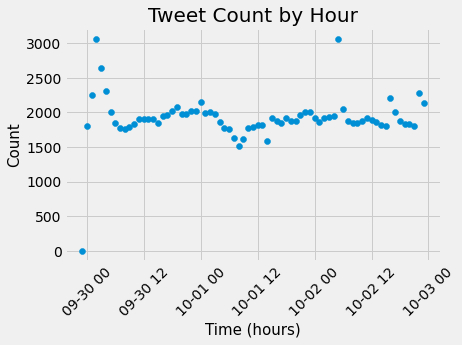

In [113]:
plot_func(df_dt_hour.index
          , df_dt_hour.id_str
          , 'Time (hours)'
          , 'Count'
          , "Tweet Count by Hour"
          , 
         )

In [114]:
df_dt_min = df_dt.resample('1min').count()
df_dt_min

,id_str,full_text,entities,source,user,is_quote_status,retweet_count,favorite_count,possibly_sensitive,lang,...,statuses_count,following,following_request,notifications,user_descriptions,sentiment_scores,compound_score,sentiment,Biden_mentions,Trump_mentions
datetime,,,,,,,,,,,,,,,,,,,,,
2020-09-29 23:59:00+00:00,2,2,2,2,2,2,2,2,1,2,...,2,2,2,2,2,2,2,2,2,2
2020-09-30 00:00:00+00:00,32,32,32,32,32,32,32,32,6,32,...,32,32,32,32,32,32,32,32,32,32
2020-09-30 00:01:00+00:00,31,31,31,31,31,31,31,31,7,31,...,31,31,31,31,31,31,31,31,31,31
2020-09-30 00:02:00+00:00,31,31,31,31,31,31,31,31,5,31,...,31,31,31,31,31,31,31,31,31,31
2020-09-30 00:03:00+00:00,31,31,31,31,31,31,31,31,9,31,...,31,31,31,31,31,31,31,31,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-02 23:55:00+00:00,36,36,36,36,36,36,36,36,8,36,...,36,36,36,36,36,36,36,36,36,36
2020-10-02 23:56:00+00:00,36,36,36,36,36,36,36,36,7,36,...,36,36,36,36,36,36,36,36,36,36
2020-10-02 23:57:00+00:00,35,35,35,35,35,35,35,35,8,35,...,35,35,35,35,35,35,35,35,35,35


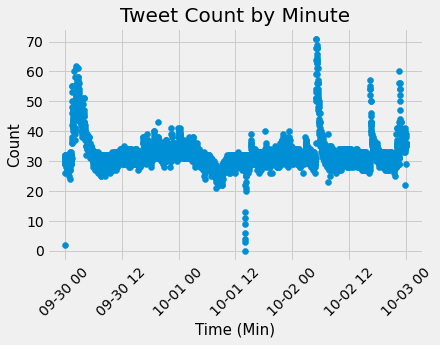

In [115]:
plot_func(df_dt_min.index
          , df_dt_min.id_str
          , 'Time (Min)'
          , 'Count'
          , 'Tweet Count by Minute'
         )

In [116]:
# 9/30/2020 Trump refuses to condemn white supremesist
# 10/2/2020 Prez and 1st lady tests postiive for COVID-19